In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor


In [24]:
anomalize_df = pd.read_csv('../data/anomalyze_df.csv')
data = anomalize_df[['date','observed_clean']]#pd.read_csv('data/price.csv').drop(axis=1, columns=['Unnamed: 0']) #petr_brent[['DATE','VALUE (US$)']]

In [26]:
data.shape

(8562, 2)

In [2]:
# df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
# df.head()

data = pd.read_csv("../data/petr_brent.csv")[["DATE", "VALUE (US$)"]]
data.head()


,DATE,VALUE (US$)
0,2001-01-01,NaN
1,2001-01-02,23.43
2,2001-01-03,23.44
3,2001-01-04,24.57
4,2001-01-05,24.77


In [3]:
data.index = pd.to_datetime(data["DATE"])
start = data.index[0].date()
end = data.index[len(data) - 1].date()
new_dates = pd.date_range(start=start, end=end, freq="D")
data = data.reindex(new_dates)
data = data.rename_axis("DATE")
data["VALUE (US$)"] = data["VALUE (US$)"].interpolate().bfill()
data.drop(columns=["DATE"], inplace=True)
data["item_id"] = "PETR_BRENT"
data.reset_index(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         8562 non-null   datetime64[ns]
 1   VALUE (US$)  8562 non-null   float64       
 2   item_id      8562 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 200.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         8562 non-null   datetime64[ns]
 1   VALUE (US$)  8562 non-null   float64       
 2   item_id      8562 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 200.8+ KB


# Modelo Univariado

In [4]:
df = TimeSeriesDataFrame.from_data_frame(
    data, id_column="item_id", timestamp_column="DATE"
)
df.head()


VALUE (US$)
item_id    timestamp              
PETR_BRENT 2001-01-01        23.43
           2001-01-02        23.43
           2001-01-03        23.44
           2001-01-04        24.57
           2001-01-05        24.77

In [5]:
fh = 550
df_train, df_test = df.train_test_split(fh)


In [6]:
df_train.shape


(8012, 1)

In [7]:
df_test.shape


(8562, 1)

In [13]:
predictor = TimeSeriesPredictor(
    prediction_length=fh,
    path="autogluon-petr",
    target="VALUE (US$)",
    eval_metric="WQL",
    quantile_levels=[0.1, 0.5, 0.75, 0.9],
)


In [14]:
predictor.fit(
    df_train,
    presets="fast_training",
    time_limit=600,
    num_val_windows=5,
    random_seed=123,
)


Beginning AutoGluon training... Time limit = 600s


AutoGluon will save models to 'autogluon-petr'


=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:59 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8122
CPU Count:          8
GPU Count:          0
Memory Avail:       1.53 GB / 8.00 GB (19.1%)
Disk Space Avail:   62.34 GB / 228.27 GB (27.3%)


Setting presets to: fast_training



Fitting with arguments:


{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 5,
 'prediction_length': 550,
 'quantile_levels': [0.1, 0.5, 0.75, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'VALUE (US$)',
 'time_limit': 600,
 'verbosity': 2}



Inferred time series frequency: 'D'


Provided train_data has 8012 rows, 1 time series. Median time series length is 8012 (min=8012, max=8012). 



Provided data contains following columns:


	target: 'VALUE (US$)'



AutoGluon will gauge predictive performance using evaluation metric: 'WQL'


	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.



Starting training. Start time is 2024-06-30 16:47:04


Models that will be trained: ['Naive', 'SeasonalNaive', 'RecursiveTabular', 'DirectTabular', 'ETS', 'Theta']


Training timeseries model Naive. Training for up to 85.6s of the 599.4s of remaining time.


	-0.1924       = Validation score (-WQL)


	5.59    s     = Training runtime


	0.04    s     = Validation (prediction) runtime


Training timeseries model SeasonalNaive. Training for up to 99.0s of the 593.7s of remaining time.


	-0.1740       = Validation score (-WQL)


	0.28    s     = Training runtime


	0.04    s     = Validation (prediction) runtime


Training timeseries model RecursiveTabular. Training for up to 118.7s of the 593.4s of remaining time.


	-0.2131       = Validation score (-WQL)


	36.87   s     = Training runtime


	4.34    s     = Validation (prediction) runtime


Training timeseries model DirectTabular. Training for up to 138.0s of the 552.2s of remaining time.


	-0.3104       = Validation score (-WQL)


	92.39   s     = Training runtime


	0.19    s     = Validation (prediction) runtime


Training timeseries model ETS. Training for up to 153.2s of the 459.6s of remaining time.


	-0.2080       = Validation score (-WQL)


	20.81   s     = Training runtime


	1.15    s     = Validation (prediction) runtime


Training timeseries model Theta. Training for up to 218.8s of the 437.6s of remaining time.


	-0.1753       = Validation score (-WQL)


	15.30   s     = Training runtime


	8.61    s     = Validation (prediction) runtime


Fitting simple weighted ensemble.


	Ensemble weights: {'SeasonalNaive': 0.62, 'Theta': 0.38}


	-0.1734       = Validation score (-WQL)


	0.61    s     = Training runtime


	8.65    s     = Validation (prediction) runtime


Training complete. Models trained: ['Naive', 'SeasonalNaive', 'RecursiveTabular', 'DirectTabular', 'ETS', 'Theta', 'WeightedEnsemble']


Total runtime: 186.93 s


Best model: WeightedEnsemble


Best model score: -0.1734


In [15]:
predictions = predictor.predict(df_train)
predictions.head()


Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean        0.1        0.5       0.75        0.9
item_id    timestamp                                                        
PETR_BRENT 2022-12-09  82.522791  78.943229  82.551776  84.493569  86.242793
           2022-12-10  81.857533  77.946993  81.809111  83.885998  85.784035
           2022-12-11  81.203210  76.962433  81.098512  83.321158  85.304158
           2022-12-12  80.555365  76.276803  80.262019  82.636910  84.590971
           2022-12-13  78.423415  73.975277  78.236074  80.604417  82.815465

In [16]:
predictions.tail()


mean        0.1        0.5        0.75         0.9
item_id    timestamp                                                          
PETR_BRENT 2024-06-06  77.793919  36.923583  78.472389   99.655202  119.526450
           2024-06-07  84.294072  43.464190  84.796981  106.393528  125.821040
           2024-06-08  83.627834  43.230627  83.912054  105.754220  124.800483
           2024-06-09  82.973193  42.188175  83.574630  105.112772  124.310952
           2024-06-10  82.325421  41.783712  82.808174  104.724908  123.383465

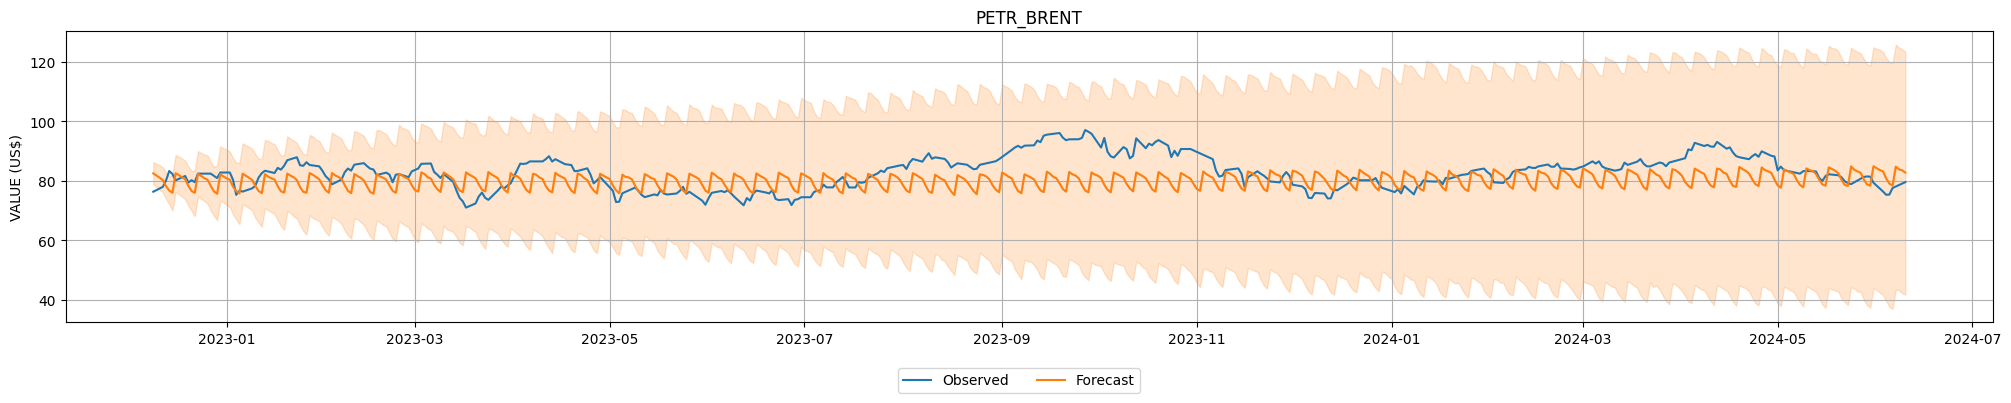

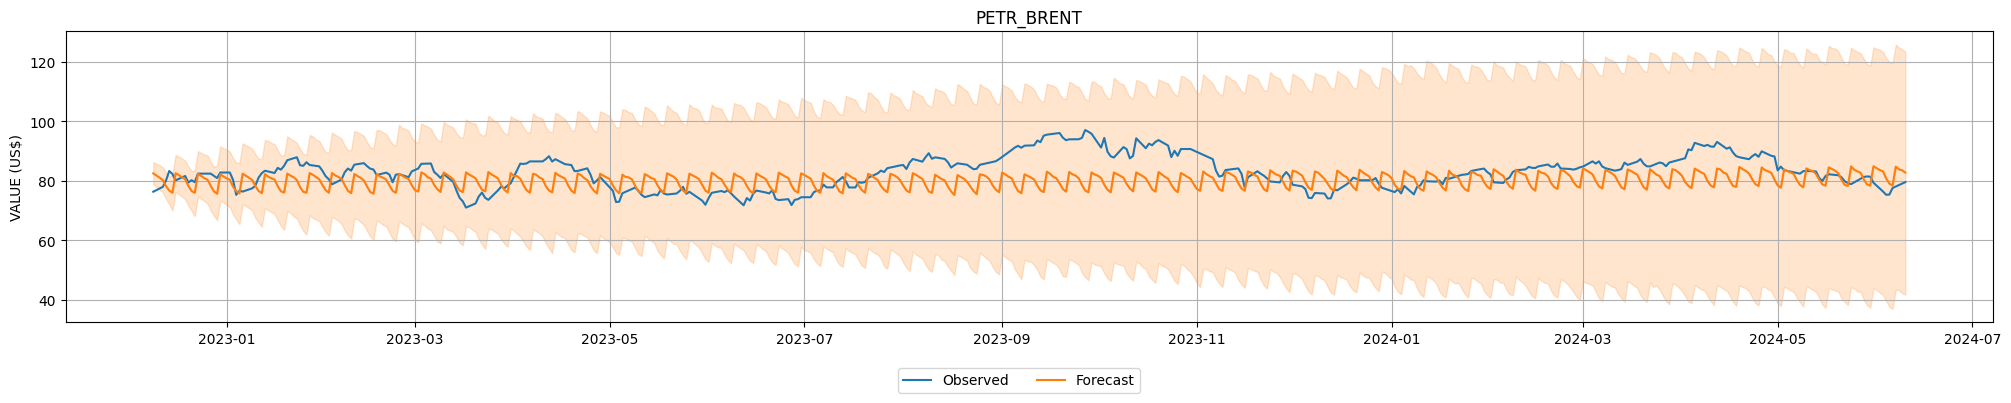

In [17]:
import matplotlib.pyplot as plt

predictor.plot(
    df_test[df_train.shape[0] :],
    predictions,
    quantile_levels=[0.1, 0.9],
)


In [18]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(df_test)


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,Theta,-0.065444,-0.175254,0.178932,8.609124,15.301090,6
1,WeightedEnsemble,-0.067624,-0.173388,0.207394,8.652184,0.613410,7
2,Naive,-0.069299,-0.192370,0.027727,0.042947,5.593806,1
3,ETS,-0.069322,-0.207953,0.888677,1.149273,20.806700,5
4,SeasonalNaive,-0.072363,-0.174013,0.027758,0.043059,0.276078,2
5,RecursiveTabular,-0.119004,-0.213089,1.533022,4.343085,36.873016,3
6,DirectTabular,-0.208736,-0.310446,0.124594,0.194679,92.385529,4


In [19]:
predictor.fit_summary()


****************** Summary of fit() ******************
Estimated performance of each model:
              model  score_val  pred_time_val  fit_time_marginal  fit_order
0  WeightedEnsemble  -0.173388       8.652184           0.613410          7
1     SeasonalNaive  -0.174013       0.043059           0.276078          2
2             Theta  -0.175254       8.609124          15.301090          6
3             Naive  -0.192370       0.042947           5.593806          1
4               ETS  -0.207953       1.149273          20.806700          5
5  RecursiveTabular  -0.213089       4.343085          36.873016          3
6     DirectTabular  -0.310446       0.194679          92.385529          4
Number of models trained: 7
Types of models trained:
{'MultiWindowBacktestingModel', 'TimeSeriesGreedyEnsemble'}
****************** End of fit() summary ******************
****************** Summary of fit() ******************
Estimated performance of each model:
              model  score_val  pred

{'model_types': {'Naive': 'MultiWindowBacktestingModel',
  'SeasonalNaive': 'MultiWindowBacktestingModel',
  'RecursiveTabular': 'MultiWindowBacktestingModel',
  'DirectTabular': 'MultiWindowBacktestingModel',
  'ETS': 'MultiWindowBacktestingModel',
  'Theta': 'MultiWindowBacktestingModel',
  'WeightedEnsemble': 'TimeSeriesGreedyEnsemble'},
 'model_performance': {'Naive': -0.1923703810769789,
  'SeasonalNaive': -0.17401316879038461,
  'RecursiveTabular': -0.21308877803921863,
  'DirectTabular': -0.31044630093995484,
  'ETS': -0.20795305801056457,
  'Theta': -0.17525434998269385,
  'WeightedEnsemble': -0.17338815698764884},
 'model_best': 'WeightedEnsemble',
 'model_paths': {'Naive': ['Naive'],
  'SeasonalNaive': ['SeasonalNaive'],
  'RecursiveTabular': ['RecursiveTabular'],
  'DirectTabular': ['DirectTabular'],
  'ETS': ['ETS'],
  'Theta': ['Theta'],
  'WeightedEnsemble': ['WeightedEnsemble']},
 'model_fit_times': {'Naive': 5.593806266784668,
  'SeasonalNaive': 0.2760775089263916,
  'R

In [21]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe
future_index = get_forecast_horizon_index_ts_dataframe(df_test, prediction_length=180)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)

known_covariates.head()

Empty DataFrame
Columns: []
Index: [(PETR_BRENT, 2024-06-11 00:00:00), (PETR_BRENT, 2024-06-12 00:00:00), (PETR_BRENT, 2024-06-13 00:00:00), (PETR_BRENT, 2024-06-14 00:00:00), (PETR_BRENT, 2024-06-15 00:00:00)]

In [22]:
predictions_out_of_sample = predictor.predict(df_test, known_covariates=known_covariates)
predictions_out_of_sample.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean        0.1        0.5       0.75        0.9
item_id    timestamp                                                        
PETR_BRENT 2024-06-11  76.964105  73.240124  76.993249  79.011372  80.829303
           2024-06-12  77.023557  72.965970  76.974829  79.129224  81.097209
           2024-06-13  78.367841  73.978483  78.262527  80.563315  82.616546
           2024-06-14  78.744630  74.314360  78.448922  80.904655  82.929994
           2024-06-15  79.027393  74.426295  78.838557  81.287627  83.571967

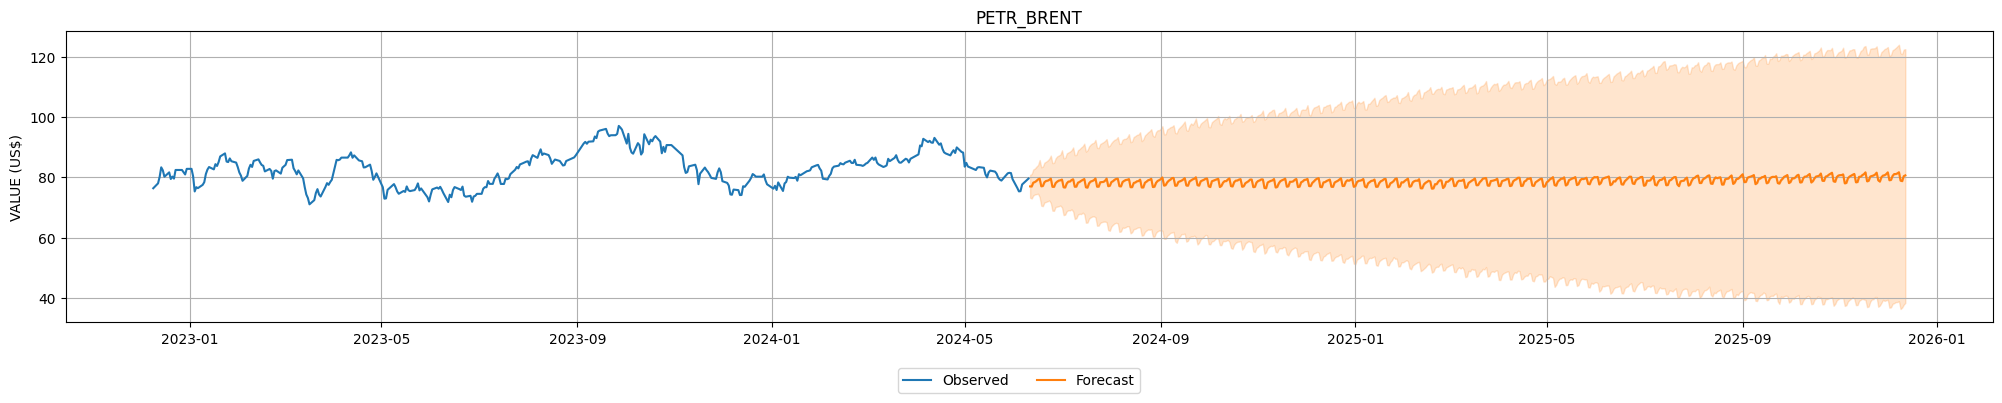

In [23]:

predictor.plot(
    df_test[df_train.shape[0] :],
    predictions_out_of_sample,
    quantile_levels=[0.1, 0.9],
)


In [130]:
predictor_1 = TimeSeriesPredictor.load("autogluon-petr")


Loading predictor from path autogluon-petr


In [131]:
predictions = predictor_1.predict(df_train)


Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


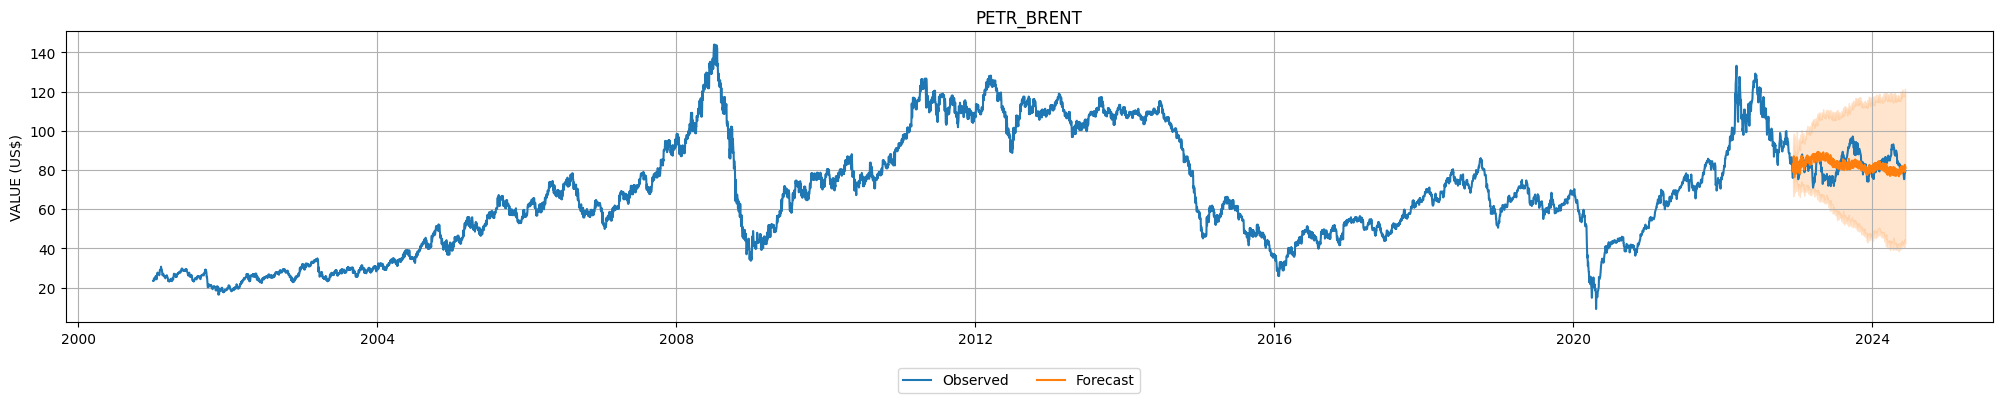

In [132]:
predictor_1.plot(df_test, predictions=predictions, quantile_levels=[0.1, 0.5, 0.9])


# Modelo Multivariado

In [4]:
# Cria as features para o modelo multivariado (covariates)
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.day_of_week
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayofyear"] = df.index.day_of_year
    return df


df_mult = create_features(data.set_index("DATE"))
df_mult.head()


,VALUE (US$),item_id,hour,dayofweek,quarter,month,year,dayofyear
DATE,,,,,,,,
2001-01-01,23.43,PETR_BRENT,0,0,1,1,2001,1
2001-01-02,23.43,PETR_BRENT,0,1,1,1,2001,2
2001-01-03,23.44,PETR_BRENT,0,2,1,1,2001,3
2001-01-04,24.57,PETR_BRENT,0,3,1,1,2001,4
2001-01-05,24.77,PETR_BRENT,0,4,1,1,2001,5


In [5]:
df_mult = TimeSeriesDataFrame.from_data_frame(
    df_mult.reset_index(),
    id_column="item_id",
    timestamp_column="DATE",
)


In [6]:
df_mult.head()


VALUE (US$)  hour  dayofweek  quarter  month  year  \
item_id    timestamp                                                        
PETR_BRENT 2001-01-01        23.43     0          0        1      1  2001   
           2001-01-02        23.43     0          1        1      1  2001   
           2001-01-03        23.44     0          2        1      1  2001   
           2001-01-04        24.57     0          3        1      1  2001   
           2001-01-05        24.77     0          4        1      1  2001   

                       dayofyear  
item_id    timestamp              
PETR_BRENT 2001-01-01          1  
           2001-01-02          2  
           2001-01-03          3  
           2001-01-04          4  
           2001-01-05          5

In [10]:
df_mult_train, df_mult_test = df_mult.train_test_split(prediction_length=fh)


In [11]:
predictor = TimeSeriesPredictor(
    prediction_length=fh,
    path="autogluon-petr-mult",
    target="VALUE (US$)",
    eval_metric="WQL",
    quantile_levels=[0.1, 0.25, 0.5, 0.75, 0.9],
    known_covariates_names=[
        "hour",
        "dayofweek",
        "quarter",
        "month",
        "year",
        "dayofyear",
    ],
)


In [12]:
predictor.fit(
    df_mult_train,
    presets="chronos_large_ensemble",
    time_limit=600,
    num_val_windows=5,
    random_seed=123,
)


Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'autogluon-petr-mult'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:59 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8122
CPU Count:          8
GPU Count:          0
Memory Avail:       2.64 GB / 8.00 GB (33.0%)
Disk Space Avail:   65.86 GB / 228.27 GB (28.9%)
Setting presets to: chronos_large_ensemble

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'batch_size': 8, 'model_path': 'large'},
                     'DirectTabular': {},
                     'PatchTST': {},
                     'RecursiveTabular': {},
                     'SeasonalNaive': {},
                     'TemporalFusionTransformer': {}},
 'known_covariates_names': ['hour',
                            'day

In [16]:
predictions = predictor.predict(df_mult_train, known_covariates=df_mult_test)
predictions.head()


Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean        0.1        0.5       0.75        0.9
item_id    timestamp                                                        
PETR_BRENT 2022-12-09  79.539444  75.143617  79.539442  81.807116  83.935267
           2022-12-10  76.164108  71.259611  76.164107  78.692210  81.068596
           2022-12-11  76.711861  71.993874  76.711863  79.146517  81.429859
           2022-12-12  76.236198  70.806977  76.236196  79.038398  81.665412
           2022-12-13  75.705269  70.134706  75.705268  78.576504  81.275845

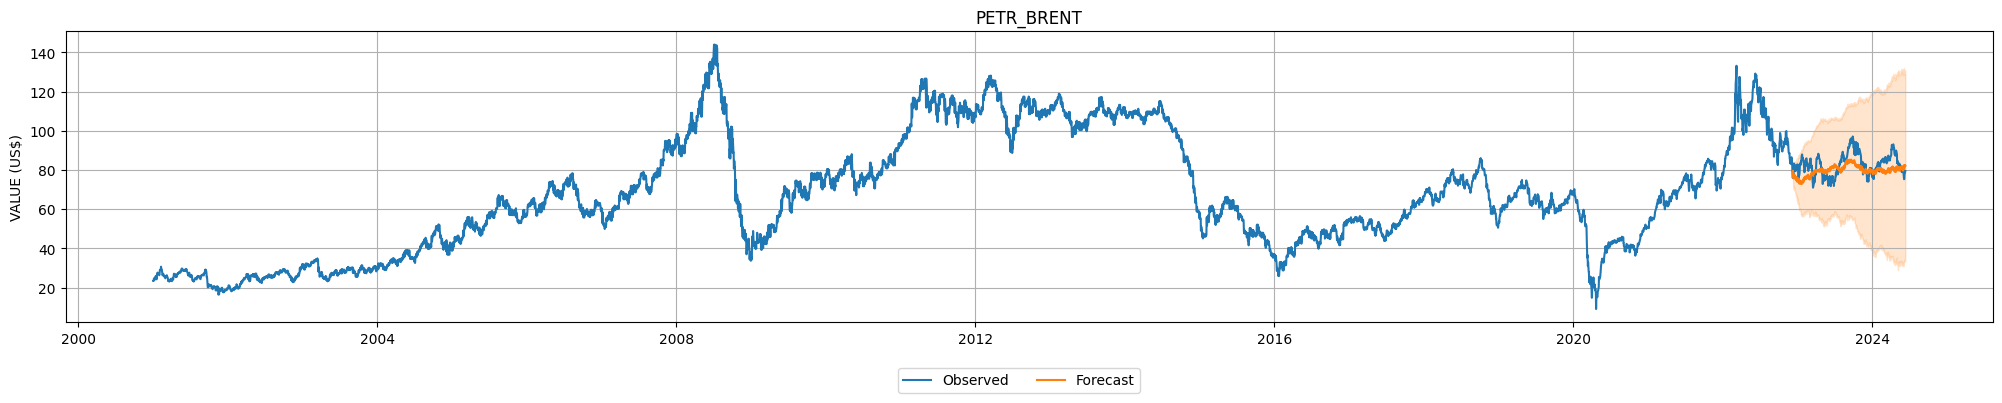

In [21]:
import matplotlib.pyplot as plt

predictor.plot(
    df_mult_test,
    predictions,
    quantile_levels=[0.1, 0.9],
)